In [2]:
from mypyc.primitives.registry import load_address_op
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
wine = load_wine()

In [3]:
import pandas as pd
pd.concat([pd.DataFrame(load_wine().data),pd.DataFrame(load_wine().target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [4]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)

In [5]:
Xtrain.shape

(124, 13)

In [6]:
Xtest.shape

(54, 13)

In [7]:
clf = tree.DecisionTreeClassifier(criterion='entropy'
                                  # 控制随机性
                                  ,random_state=0 # 随机模式， 默认为None，如果确定一个数就会一直长同一棵树让树稳定下来
                                  ,splitter='random' # 分枝方向是随机还是最优
                                  
                                  # 控制剪枝方向，防止过拟合
                                  # , max_depth=10 限制数的最大深度
                                  # ， min_sample_leaf 一个节点分枝后每个子节点必须包含的样本， 从5开始试，等于1同城是最佳选择
                                  # ， min_sample_split 每个节点必须至少包含n训练样本才能分枝
                                  # , max_features限制分枝时考虑的特征个数，超过特征个数被舍弃，不是降维的好方法，建议使用PCA邓
                                  # , min_impurity_decrease限制信息增益，信息增益小于设定数值的分枝不会发生
                                  
                                  # 目标权重调整
                                  # , class_weight 对于一组数据中，一种样本显著多余另一种，少的可能会被淹没，所以有权重选择
                                  # ， min_weight_fraction_leaf 
                                  
                                  ,)

# 重要属性和接口
# fit和score都要用的，但输入矩阵必须是二维矩阵，如是一维矩阵，使用shape(-1, 1)曾伟
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.8888888888888888

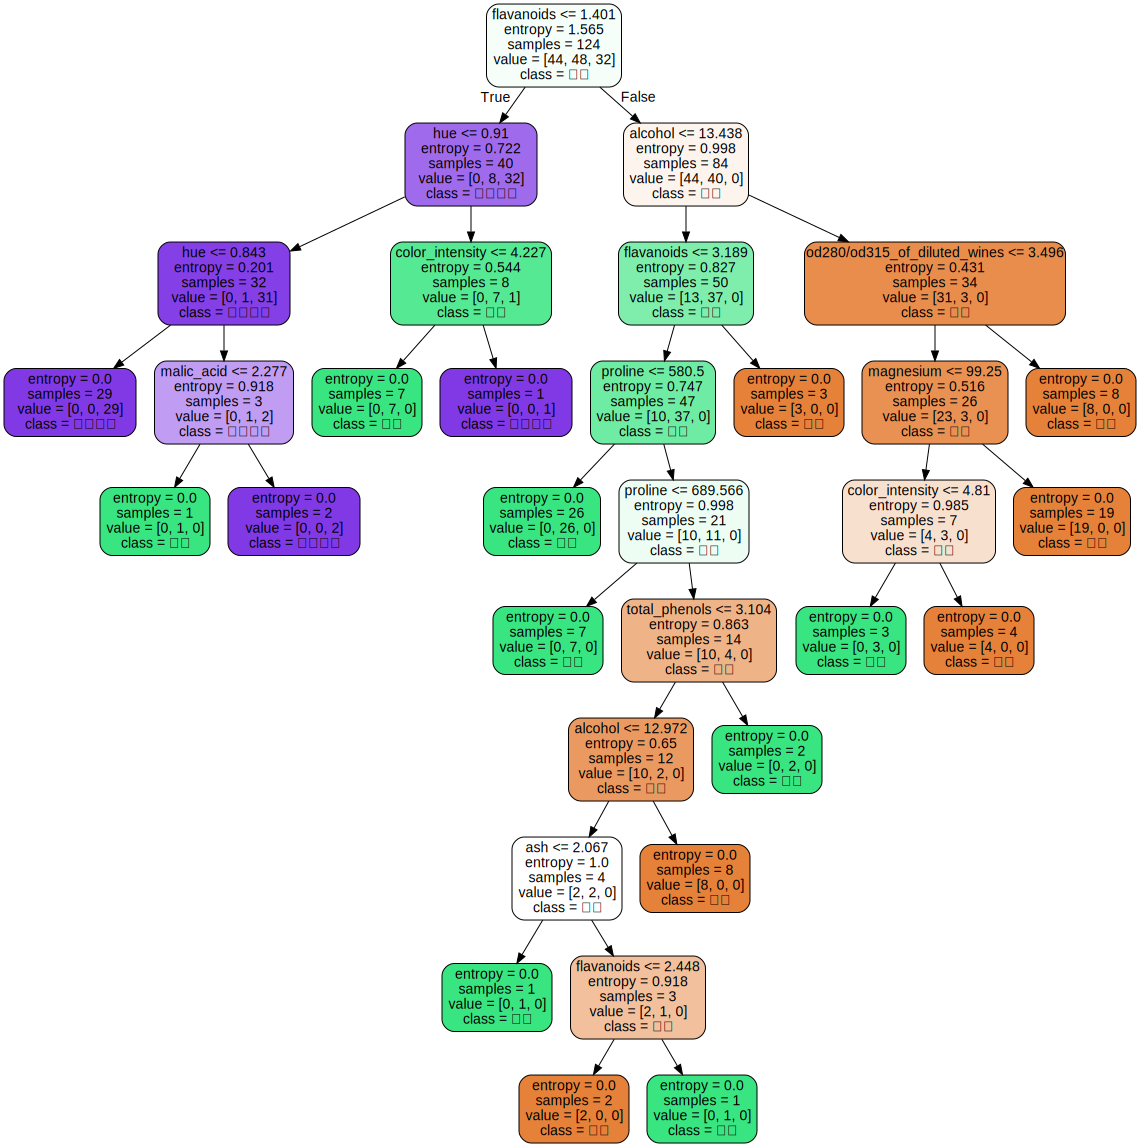

In [8]:
import graphviz
dot_data = tree.export_graphviz(clf,feature_names=wine.feature_names,
                                class_names=["琴酒", "雪莉", "贝尔摩德"],
                                filled=True, # filled 填充颜色 
                                rounded=True, # 圆角
                                )
graph = graphviz.Source(dot_data)
graph

In [9]:
[*zip(wine.feature_names, clf.feature_importances_)]

[('alcohol', 0.16331083177411443),
 ('malic_acid', 0.014198463898749618),
 ('ash', 0.006417207539883398),
 ('alcalinity_of_ash', 0.0),
 ('magnesium', 0.033593356324218795),
 ('total_phenols', 0.022076389169894125),
 ('flavanoids', 0.46531149862869825),
 ('nonflavanoid_phenols', 0.0),
 ('proanthocyanins', 0.0),
 ('color_intensity', 0.05795638613646595),
 ('hue', 0.11221996823295902),
 ('od280/od315_of_diluted_wines', 0.0063091340071745276),
 ('proline', 0.11860676428784189)]

In [10]:
# apply和predict参数只能是二维矩阵
# apply 返回每个测试样本所在的叶子节点的索引
clf.apply(Xtest)

array([19, 31, 13, 13,  6, 13, 13, 30, 32, 31, 13, 13, 13, 25, 31,  3, 15,
       13, 13, 31, 15, 25,  3, 31, 13, 21,  3, 13, 23, 32, 13,  3,  3,  8,
        3,  3,  3,  3, 31,  9, 13,  6, 13,  3,  3,  3, 13, 13, 31, 31, 31,
        3, 23, 31], dtype=int64)

In [11]:
# predict 返回每个测试样本的分类/回归结果
clf.predict(Xtest)

array([1, 0, 1, 1, 2, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 2, 1, 1, 1, 0, 1, 0,
       2, 0, 1, 0, 2, 1, 0, 0, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2,
       2, 2, 1, 1, 0, 0, 0, 2, 0, 0])

In [1]:
# 泰坦尼克号数据预测
import math

In [4]:
(0.6*math.log2(0.6))

-0.44217935649972373